In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
#from googletrans import Translator
#from google.cloud import translate
%matplotlib inline

KeyboardInterrupt: 

In [2]:
train = pd.read_csv('./train_1.csv')
import codecs
import csv
trans =[]
with codecs.open('./translation.csv', "r",encoding='utf-8', errors='ignore') as f:
    reader = csv.reader(f, delimiter=',')
    header = next(reader)
    for values in reader:
        trans.append(values[1])

train.head()

Page  2015-07-01  2015-07-02  \
0            2NE1_zh.wikipedia.org_all-access_spider        18.0        11.0   
1             2PM_zh.wikipedia.org_all-access_spider        11.0        14.0   
2              3C_zh.wikipedia.org_all-access_spider         1.0         0.0   
3         4minute_zh.wikipedia.org_all-access_spider        35.0        13.0   
4  52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...         NaN         NaN   

   2015-07-03  2015-07-04  2015-07-05  2015-07-06  2015-07-07  2015-07-08  \
0         5.0        13.0        14.0         9.0         9.0        22.0   
1        15.0        18.0        11.0        13.0        22.0        11.0   
2         1.0         1.0         0.0         4.0         0.0         3.0   
3        10.0        94.0         4.0        26.0        14.0         9.0   
4         NaN         NaN         NaN         NaN         NaN         NaN   

   2015-07-09     ...      2016-12-22  2016-12-23  2016-12-24  2016-12-25  \
0        26.0     ...            32.0        63.0        15.0        26.0   
1        10.0     ...            17.0        42.0        28.0        15.0   
2         4.0     ...             3.0         1.0         1.0         7.0   
3        11.0     ...            32.0        10.0        26.0        27.0   
4         NaN     ...            48.0         9.0        25.0        13.0   

   2016-12-26  2016-12-27  2016-12-28  2016-12-29  2016-12-30  2016-12-31  
0        14.0        20.0        22.0        19.0        18.0        20.0  
1         9.0        30.0        52.0        45.0        26.0        20.0  
2         4.0         4.0         6.0         3.0         4.0        17.0  
3        16.0        11.0        17.0        19.0        10.0        11.0  
4         3.0        11.0        27.0        13.0        36.0        10.0  

[5 rows x 551 columns]

In [3]:
def get_language(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        return res.group(0)
    return 'na'

train['lang'] = train.Page.map(get_language)
#train['text']

from collections import Counter

print(Counter(train.lang))

def get_text(page):
    res = re.search('[a-z][a-z].wikipedia.org',page)
    if res:
        foo=res.group(0)
        #print(foo[:2])
        bar = " ".join(page[:page.index(foo)].split("_"))
        #print(bar)
        #tra = translator.translate(bar)
        #print(tra.text)
        #return tra.text
        return bar
    return 'na'

train['text'] = train.Page.map(get_text)


Counter({'en.wikipedia.org': 24108, 'ja.wikipedia.org': 20431, 'de.wikipedia.org': 18547, 'na': 17855, 'fr.wikipedia.org': 17802, 'zh.wikipedia.org': 17229, 'ru.wikipedia.org': 15022, 'es.wikipedia.org': 14069})


In [ ]:
from googletrans import Translator
#from mtranslate import translate
#translator = Translator()
trans = []
def tl(x,y):   
    for i in range(x,y):
        translator = Translator()
        foo = train['text'][i]
        tra = translator.translate(foo)
        #tra = translate(foo)
        #print(tra.text)
        trans.append(tra.text)
        del translator
    return trans
lation = tl(0,145062)
outdf = pd.DataFrame(lation)
outdf.to_csv('translation.csv')

In [ ]:
for row in train.

In [36]:
import codecs
import os

GLOVE_DIR = 'D:/Embeddings/Glove/'
MAX_NB_WORDS = 220000
EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 72

print('Indexing word vectors.')
embeddings_index = {}

#f = codecs.open(os.path.join(LEX_DIR, 'lexvec.300d.W.pos.vectors'), encoding='utf_8')
#f = codecs.open(os.path.join(GLOVE_DIR, 'glove.840B.300d.txt'), encoding='utf_8')
f = codecs.open(os.path.join(GLOVE_DIR, 'glove.6B.300d.txt'), encoding='utf_8')
for line in f:
    values = line.split(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

Indexing word vectors.
Found 400000 word vectors.


In [37]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(trans)

sequences = tokenizer.texts_to_sequences(trans)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.
C:\Anaconda2\envs\tf\lib\site-packages\keras\preprocessing\text.py:89: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


Found 30834 unique tokens.


In [41]:
from keras.preprocessing.sequence import pad_sequences
data_1 = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', data_1.shape)

Shape of data tensor: (145063, 72)


In [ ]:
print('Preparing embedding matrix.')
# prepare embedding matrix
nb_words = min(MAX_NB_WORDS, len(word_index))

embedding_matrix = np.zeros((nb_words, EMBEDDING_DIM))
for word, i in word_index.items():
    #word = word.decode('utf-8','ignore')
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

In [4]:
def _load_data(data, n_prev = 7):  
    """
    data should be pd.DataFrame()
    """

    docX, docY = [], []
    for i in range(len(data)-n_prev):
        docX.append(data.iloc[i:i+n_prev].as_matrix())
        docY.append(data.iloc[i+n_prev].as_matrix())
    alsX = np.array(docX)
    alsY = np.array(docY)

    return alsX, alsY

def train_test_split(df, test_size=0, n_prev = 7):  
    """
    This just splits data to training and testing parts
    """   
    ntrn = round(len(df) * (1 - test_size))
    ntrn = int(ntrn)
    X_train, y_train = _load_data(df.iloc[0:ntrn], n_prev)
    #X_test, y_test = _load_data(df.iloc[ntrn:], n_prev)

    return (X_train, y_train)# , (X_test, y_test)


In [377]:
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

# scale train and test data to [-1, 1]
def scale(train):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(train)
    # transform train
    #train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    #test = test.reshape(test.shape[0], test.shape[1])
    #test_scaled = scaler.transform(test)
    return scaler, train_scaled #, test_scaled

# inverse scaling for a forecasted value
def invert_scale(scaler, X, yhat):
    new_row = [x for x in X] + [yhat]
    array = np.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]

In [406]:
float(mean_sc)

0.0036429872495446266

In [422]:
length_of_sequences = 8
mean_sc = np.mean(xtrain.diff(axis=0).iloc[1:])
std_sc = np.std(xtrain.diff(axis=0).iloc[1:])
#scal = scaler.fit(xtrain.diff(axis=0).iloc[1:])
#xx = scal.transform(xtrain.diff(axis=0).iloc[1:])
xx = (xtrain.diff(axis=0).iloc[1:]-mean_sc)/(1.5*std_sc)
(X_train, y_train) = train_test_split(pd.DataFrame(xx), n_prev = length_of_sequences)

In [417]:
std_sc

0    36.677048
dtype: float64

In [273]:
from keras.layers import Dense, Input, merge, LSTM, Dropout, Bidirectional, Embedding, Activation, Flatten
#from keras.layers import Conv1D, MaxPooling1D, Embedding, Flatten, Lambda
from keras.models import Model,Sequential
from keras.layers.wrappers import TimeDistributed
#from keras.layers.wrappers import TimeDistributed, Bidirectional
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Model Architecture #
#num_lstm = np.random.randint(int(MAX_SEQUENCE_LENGTH*0.75), int(MAX_SEQUENCE_LENGTH*1.25))
num_lstm = 512
num_dense = 32
#num_dense = np.random.randint(int(0.75*num_lstm/2.0), int(1.25*num_lstm/2.0))
#rate_drop_lstm = 0.15 + np.random.rand() * 0.15
#rate_drop_dense = 0.15 + np.random.rand() * 0.15

rate_drop_lstm = 0.5
rate_drop_dense = 0.5

#rate_drop_lstm = 0.00
#rate_drop_dense = 0.00

act = 'relu'
re_weight = True # whether to re-weight classes to fit the 17.5% share in test set

STAMP = 'lstm_+Glove840B%d_%d_%.2f_%.2f'%(num_lstm, num_dense, rate_drop_lstm, rate_drop_dense)

embedding_layer = Embedding(nb_words, EMBEDDING_DIM, weights=[embedding_matrix], input_length=MAX_SEQUENCE_LENGTH, trainable=False)
                            
#shared_lstm = Bidirectional(LSTM(num_lstm, dropout=rate_drop_lstm, recurrent_dropout=rate_drop_lstm))
#shared_lstm = Bidirectional(LSTM(num_lstm))
#shared_lstm = LSTM(num_lstm)

y1 =[]
seq1 = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
es1 = embedding_layer(seq1)
y1 = Bidirectional(LSTM(num_lstm))(es1)

seq2 = Input(shape=(7,))
y2 = LSTM(num_lstm, batch_input_shape=(None, 7, num_lstm))(seq2)

merged = merge([y1,y2], mode='concat')
merged = BatchNormalization()(merged)
merged = Dropout(rate_drop_dense)(merged)
merged = Dense(num_dense, activation=act)(merged)
merged = Dropout(rate_drop_dense)(merged)
merged = BatchNormalization()(merged)
merged = Dense(num_dense, activation=act)(merged)
merged = Dropout(rate_drop_dense)(merged)
merged = BatchNormalization()(merged)
merged = Dense(num_dense, activation=act)(merged)
merged = Dropout(rate_drop_dense)(merged)
merged = BatchNormalization()(merged)
preds = Dense(7, activation='linear')(merged)

model = Model(input=[seq1, seq2], output=preds)
model.compile(loss='mean_squared_error', optimizer='nadam', metrics=['acc'])

print(STAMP)

early_stopping =EarlyStopping(monitor='val_loss', patience=4)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

hist = model.fit([train_sequences['Top1'], train_sequences['Top2']], train_label, epochs=1, batch_size=256, shuffle=True, class_weight=class_weight, callbacks=[early_stopping, model_checkpoint])
  
model.load_weights(bst_model_path)
bst_val_score=min(hist.history['val_loss'])

preds = model.predict(test_sequences,batch_size=2048, verbose=1)
#preds += model.predict([test_data_2, test_data_1], batch_size=2048, verbose=1)
preds /= 2.0
print(bst_val_score)

#out_df = pd.DataFrame({"test_id":test_labels, "is_duplicate":preds.ravel()})
#out_df.to_csv('%.4f_'%(bst_val_score)+STAMP+'.csv', index=False)
#del out_df


NameError: name 'nb_words' is not defined

In [82]:
import gc
gc.collect()

703

In [26]:
from keras.models import Model,Sequential
from keras.layers import LSTM, Dropout, Dense, Activation

def fit(X,y,length_of_sequences):
    in_out_neurons = 1
    hidden_neurons = 32
    bs = 32

    model = Sequential()  
    model.add(LSTM(hidden_neurons, batch_input_shape=(None, length_of_sequences, in_out_neurons), return_sequences=False))
    #model.add(LSTM(hidden_neurons, input_dim=length_of_sequences, return_sequences=True))
    model.add(Dropout(0.5))
    #model.add(TimeDistributedDense(length_of_sequences))
    model.add(Dense(32))
    model.add(Activation("relu")) 
    model.add(Dropout(0.5))
    model.add(Dense(in_out_neurons))
    model.add(Activation("linear"))  
    model.compile(loss="mean_squared_error", optimizer="nadam")

    model.fit(X, y, batch_size=bs, epochs=15, validation_split=0)  
     
    #model.fit(X_train, y_train, batch_size=bs, nb_epoch=15, validation_data=(X_test, y_test), callbacks=[remote])     
     
    #predicted = model.predict(X) 
    #dataf =  pd.DataFrame(predicted[:1200])
    #dataf.columns = ["predict"]
    #dataf["input"] = y_test[:1200]
    #dataf.plot(figsize=(15, 5))

    #score = model.evaluate(X_test.as_matrix(), y_test, batch_size=16)
    #score = model.evaluate(X_test, y_test, batch_size=32)
    return model


In [28]:
model = fit(X_train,y_train,length_of_sequences)

Epoch 1/15
542/542 [==============================] - 5s - loss: 505.1854     
Epoch 2/15
542/542 [==============================] - 0s - loss: 430.6489     
Epoch 3/15
542/542 [==============================] - 0s - loss: 352.9627     
Epoch 4/15
542/542 [==============================] - 0s - loss: 326.2539     
Epoch 5/15
542/542 [==============================] - 0s - loss: 287.5176     
Epoch 6/15
542/542 [==============================] - 0s - loss: 276.2130     
Epoch 7/15
542/542 [==============================] - 0s - loss: 262.2908     
Epoch 8/15
542/542 [==============================] - 0s - loss: 262.4999     
Epoch 9/15
542/542 [==============================] - 0s - loss: 248.5259     
Epoch 10/15
542/542 [==============================] - 0s - loss: 245.7734     
Epoch 11/15
542/542 [==============================] - 0s - loss: 244.4498     
Epoch 12/15
542/542 [==============================] - 0s - loss: 233.4693     
Epoch 13/15
542/542 [============================

In [29]:
#inverted = scal.inverse_transform(model.predict(X_train))
inverted = float(1.5*std_sc)*model.predict(X_train) + float(mean_sc)
plt.plot(xtrain.diff(axis=0).iloc[1:].values)
plt.plot(inverted)
plt.show()

TypeError: cannot convert the series to <class 'float'>

In [156]:
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

# run a repeated experiment
def experiment(repeats, series, features):
    # transform data to be stationary
    raw_values = series.values
    diff_values = difference(raw_values, 1)
    # transform data to be supervised learning
    supervised = timeseries_to_supervised(diff_values, features)
    supervised_values = supervised.values[features:,:]
    # split data into train and test-sets
    train, test = supervised_values[0:-12, :], supervised_values[-12:, :]
    # transform the scale of the data
    scaler, train_scaled, test_scaled = scale(train, test)
    # run experiment
    error_scores = list()
    for r in range(repeats):
        # fit the base model
        lstm_model = fit_lstm(train_scaled, 1, 500, 1)
        # forecast test dataset
        predictions = list()
        for i in range(len(test_scaled)):
            # predict
            X, y = test_scaled[i, 0:-1], test_scaled[i, -1]
            yhat = forecast_lstm(lstm_model, 1, X)
            # invert scaling
            yhat = invert_scale(scaler, X, yhat)
            # invert differencing
            yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
            # store forecast
            predictions.append(yhat)
        # report performance
        rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
        print('%d) Test RMSE: %.3f' % (r+1, rmse))
        error_scores.append(rmse)
    return error_scores
 
# execute the experiment
def run():
    # load dataset
    series = read_csv('shampoo-sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
    # experiment
    repeats = 10
    results = DataFrame()
    # run experiment
    features = 1
    results['results'] = experiment(repeats, series, features)
    # summarize results
    print(results.describe())
    # save results
    results.to_csv('experiment_features_1.csv', index=False)
 
 # entry point
#run()

In [176]:
inverted = scal.inverse_transform(model.predict(X_train))

In [ ]:
for row in train.iteritems():
    

C:\Anaconda2\envs\tf\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


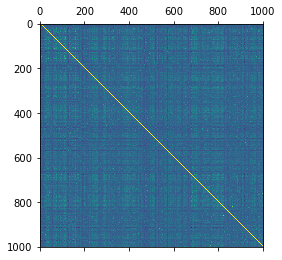

In [18]:
correl = train.T.ix[:,:1000].corr(method='pearson')
plt.matshow(correl)

In [40]:
#Simple K-means clustering using bag-of-words
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(trans)

true_k = 100
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print ("Cluster %d:" % i,)
    for ind in order_centroids[i, :10]:
        print (' %s' % terms[ind],)
    print

ValueError: setting an array element with a sequence.

In [46]:
int(len(word_index)/5)

6166

In [62]:
#Clustering of word vectors from Glove semantic embedding
model1 = KMeans(n_clusters=1000, init='k-means++', max_iter=100, n_init=1)
idx = model1.fit_predict(data_1)
zippo = zip(idx,trans)
dicto={}
for key,val in zippo:
    dicto.setdefault(key,[]).append(val)

In [66]:
#Clustering based on nltk document classification
from nltk.corpus import reuters


In [67]:
#find topic similarity based on correlation


{0: ['Android',
  'BLACK PINK',
  'Beyond',
  'Energy',
  'IPhone',
  'Zhang Bin',
  'Scotland',
  'Green table home first plan',
  'Pacific Island Airport',
  'Winter solstice',
  'Iceland',
  'Lin Chen Xi',
  'King sweet',
  'California',
  'Aleppo',
  'Canada',
  'Islam',
  'Thousands of star awards ceremony',
  'Big masters',
  'Alice in Wonderland',
  'Li Yun',
  'Thanksgiving',
  'April is your lie',
  'Gold and silver',
  'Islam',
  'Philippines',
  'Lin Run ?',
  'The power of the times',
  'Attack the giant',
  'Billy',
  'dawn',
  'Paralympic',
  'Wang Xi',
  'Wu Bai',
  'Young and Dangerous',
  'The tree is deep',
  'Halloween',
  'Yang Mi',
  'Love of all things',
  'White hundred',
  'Syria',
  'U.S. Congress',
  'Chen Gong',
  'Li Yi Feng',
  'Ghost in the shell',
  'Li Bai',
  'Summer solstice',
  'Hong Kong TV entertainment',
  'US House of Representatives',
  'Category: Clothing',
  'Zodiac',
  'Good news',
  'Song Qian',
  'Ecuador',
  'X-Men: the future of the past',

In [70]:
train.head()

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.0        11.0         5.0        13.0        14.0         9.0   
1        11.0        14.0        15.0        18.0        11.0        13.0   
2         1.0         0.0         1.0         1.0         0.0         4.0   
3        35.0        13.0        10.0        94.0         4.0        26.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10     ...      2016-12-22  \
0         9.0        22.0        26.0        24.0     ...            32.0   
1        22.0        11.0        10.0         4.0     ...            17.0   
2         0.0         3.0         4.0         4.0     ...             3.0   
3        14.0         9.0        11.0        16.0     ...            32.0   
4         0.0         0.0         0.0         0.0     ...            48.0   

   2016-12-23  2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
0        63.0        15.0        26.0        14.0        20.0        22.0   
1        42.0        28.0        15.0         9.0        30.0        52.0   
2         1.0         1.0         7.0         4.0         4.0         6.0   
3        10.0        26.0        27.0        16.0        11.0        17.0   
4         9.0        25.0        13.0         3.0        11.0        27.0   

   2016-12-29  2016-12-30  2016-12-31  
0        19.0        18.0        20.0  
1        45.0        26.0        20.0  
2         3.0         4.0        17.0  
3        19.0        10.0        11.0  
4        13.0        36.0        10.0  

[5 rows x 550 columns]

In [81]:
correl.head()

0         1         2         3         4         5         6     \
0  1.000000  0.006674  0.107552  0.051414  0.019983  0.116415  0.037052   
1  0.006674  1.000000 -0.023977  0.018313  0.123006  0.039107  0.109879   
2  0.107552 -0.023977  1.000000  0.024327  0.000653  0.015520 -0.016711   
3  0.051414  0.018313  0.024327  1.000000 -0.018934  0.062238  0.007308   
4  0.019983  0.123006  0.000653 -0.018934  1.000000  0.054755  0.169916   

       7         8         9       ...         991       992       993   \
0 -0.016563  0.067522  0.143657    ...     0.021877  0.096634  0.104536   
1  0.011804 -0.001836  0.015773    ...     0.053840  0.062026 -0.022628   
2 -0.032960  0.026024  0.063176    ...     0.050693  0.042349  0.089032   
3 -0.030528 -0.014535  0.041338    ...     0.058264  0.048816  0.124904   
4 -0.008742  0.034185  0.165045    ...     0.053265  0.089653  0.091220   

       994       995       996       997       998       999       1000  
0  0.010285  0.022003  0.026501  0.062940  0.065552  0.008749 -0.017385  
1 -0.039798 -0.059320  0.016760  0.027006  0.019490 -0.043544  0.003229  
2  0.053636 -0.016418 -0.008711  0.017461 -0.018751 -0.006639  0.010951  
3  0.020488 -0.052411  0.040089  0.050787  0.077950 -0.003880  0.064596  
4  0.047730 -0.015444  0.145549 -0.006668  0.007122 -0.006664  0.086052  

[5 rows x 1001 columns]

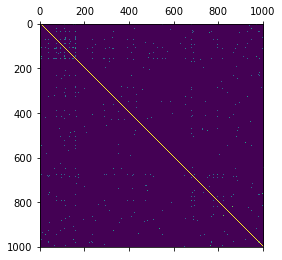

In [98]:
cf=correl[correl > 0.3].fillna(0)
plt.matshow(cf)

In [100]:
ind=correl[correl > 0.3].index.tolist()

In [102]:
correl.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
             991,  992,  993,  994,  995,  996,  997,  998,  999, 1000],
           dtype='int64', length=1001)

In [103]:
train.head()

2015-07-01  2015-07-02  2015-07-03  2015-07-04  2015-07-05  2015-07-06  \
0        18.0        11.0         5.0        13.0        14.0         9.0   
1        11.0        14.0        15.0        18.0        11.0        13.0   
2         1.0         0.0         1.0         1.0         0.0         4.0   
3        35.0        13.0        10.0        94.0         4.0        26.0   
4         0.0         0.0         0.0         0.0         0.0         0.0   

   2015-07-07  2015-07-08  2015-07-09  2015-07-10     ...      2016-12-22  \
0         9.0        22.0        26.0        24.0     ...            32.0   
1        22.0        11.0        10.0         4.0     ...            17.0   
2         0.0         3.0         4.0         4.0     ...             3.0   
3        14.0         9.0        11.0        16.0     ...            32.0   
4         0.0         0.0         0.0         0.0     ...            48.0   

   2016-12-23  2016-12-24  2016-12-25  2016-12-26  2016-12-27  2016-12-28  \
0        63.0        15.0        26.0        14.0        20.0        22.0   
1        42.0        28.0        15.0         9.0        30.0        52.0   
2         1.0         1.0         7.0         4.0         4.0         6.0   
3        10.0        26.0        27.0        16.0        11.0        17.0   
4         9.0        25.0        13.0         3.0        11.0        27.0   

   2016-12-29  2016-12-30  2016-12-31  
0        19.0        18.0        20.0  
1        45.0        26.0        20.0  
2         3.0         4.0        17.0  
3        19.0        10.0        11.0  
4        13.0        36.0        10.0  

[5 rows x 550 columns]

In [223]:
from statsmodels.tsa.api import VAR, DynamicVAR

#model = VAR(train.T)
scal, xx = scale(train)
XX=pd.DataFrame(xx)
XX.columns = train.columns
XXx = XX.diff()
XXx = XXx.iloc[1:]

In [253]:
output =[]
ZZ = train.diff().iloc[1:]
for i in range(0,18133):
    if i == 0:
        start = 8*i
        end = 8*(i+1) - 1
    else:
        start = (8*i)
        end = 8*(i+1)-1
    print(start, end)    
    model2 = VAR(ZZ.T.iloc[:,start:end])
    results = model2.fit(maxlags=3,ic ='aic',trend='nc')
    #results = model2.fit()
    #print(results.summary())
    lag_order = results.k_ar
    ypred = results.forecast(ZZ.T.iloc[:,start:end].values[-lag_order:],1)
    output.append(ypred)

0 7
8 15
16 23
24 31
32 39
40 47
48 55
56 63
64 71
72 79
80 87
88 95
96 103
104 111
112 119
120 127
128 135
136 143
144 151
152 159
160 167
168 175
176 183
184 191
192 199
200 207
208 215
216 223
224 231
232 239
240 247
248 255
256 263
264 271
272 279
280 287
288 295
296 303
304 311
312 319
320 327
328 335
336 343
344 351
352 359
360 367
368 375
376 383
384 391
392 399
400 407
408 415
416 423
424 431
432 439
440 447
448 455
456 463
464 471
472 479
480 487
488 495
496 503
504 511
512 519
520 527
528 535
536 543
544 551
552 559
560 567
568 575
576 583
584 591
592 599
600 607
608 615
616 623
624 631
632 639
640 647
648 655
656 663
664 671
672 679
680 687
688 695
696 703
704 711
712 719
720 727
728 735
736 743
744 751
752 759
760 767
768 775
776 783
784 791
792 799
800 807
808 815
816 823
824 831
832 839
840 847
848 855
856 863
864 871
872 879
880 887
888 895
896 903
904 911
912 919
920 927
928 935
936 943
944 951
952 959
960 967
968 975
976 983
984 991
992 999
1000 1007
1008 1015
1016 102

LinAlgError: 7-th leading minor not positive definite

In [264]:
ZZ = train.diff().iloc[1:]   
model2 = VAR(ZZ.T)
results = model2.fit(maxlags=3,ic ='aic',trend='nc')
#results = model2.fit()
#print(results.summary())
lag_order = results.k_ar
ypred = results.forecast(ZZ.T.values[-lag_order:],1)

MemoryError: 

In [228]:
lag_order = results.k_ar
ypred = results.forecast(XX.T.iloc[:,:10].values[-lag_order:],5)

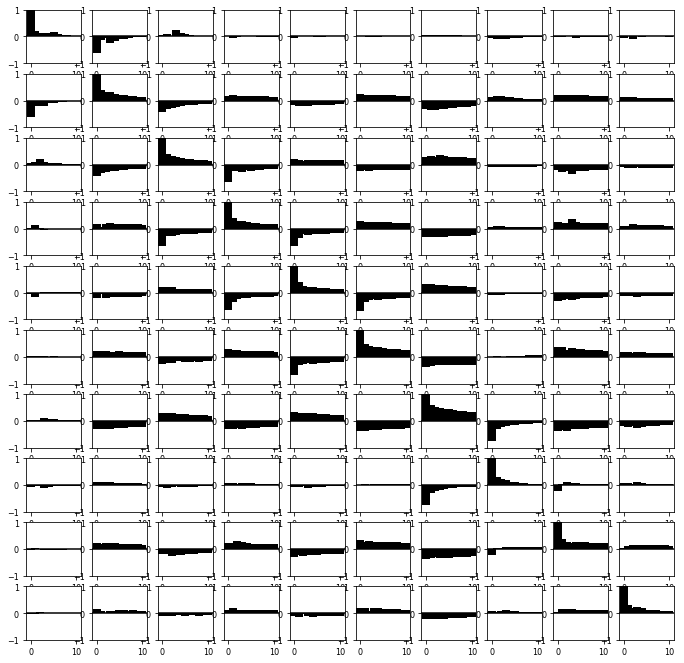

In [227]:
results.plot_acorr()

In [ ]:
def DTWDistance(s1, s2, w):
    DTW={}

    w = max(w, abs(len(s1)-len(s2)))

    for i in range(-1,len(s1)):
        for j in range(-1,len(s2)):
            DTW[(i, j)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(max(0, i-w), min(len(s2), i+w)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):

        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])

        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2

    return np.sqrt(LB_sum)

def Euclid(s1, s2):
    dist = np.linalg.norm(s1-s2)
    return dist

#Return centroids of clusters
def k_means_clust(data,num_clust,num_iter,w=4):
    centroid_list=random.sample(list(data.columns.values),num_clust)
    centroids = data[centroid_list]
    counter=0
    for n in range(num_iter):
        counter+=1
        #print "Iteration: ", counter
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                if LB_Keogh(data[i],centroids[j],5)<min_dist:
                    #cur_dist=DTWDistance(data[i],centroids[j],w)
                    cur_dist=np.linalg.norm(data[i]-centroids[j])
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            
            if closest_clust in assignments:
                assignments[closest_clust].append(i)
            else:
                assignments[closest_clust]=[]

        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=np.zeros(shape=len(data))
            if assignments[key]:
                for k in assignments[key]:
                    clust_sum = clust_sum + np.transpose(data[k].values)  
                centroids.columns = assignments.keys()
                centroids[key]=clust_sum/len(assignments[key])
                
    centroids.reindex(index=data.index.values) 
    
    return centroids

#Assign test data to centroids
def assignments(test, centroids, w):
    assignments={}
    dists = []
    for ind, i in enumerate(test):
        min_dist=float('inf')
        cur_dist=float('inf')
        closest_clust=None    
        for c_ind,j in enumerate(centroids):
            if LB_Keogh(test[i],centroids[j],5)<min_dist:
                #cur_dist=DTWDistance(test[i],centroids[j],w)
                #cur_dist=Euclid(data[i],centroids[j])
                cur_dist=np.linalg.norm(test[i]-centroids[j])
                if cur_dist<min_dist:
                    min_dist=cur_dist
                    closest_clust=c_ind
        
        if assignments.has_key(closest_clust):       
            assignments[closest_clust].append(i)
        else:
            assignments[closest_clust]=[]
            assignments[closest_clust].append(i)
        
        dists.append((i,min_dist))
        
    return assignments, dists 

In [ ]:
centroids = k_means_clust(train.T,200,2,4)
asses, dists = assignments(train.T,centroids,4)


KeyboardInterrupt



In [ ]:
r = np.random.rand()
beta = 1-10**(- r - 1)

In [ ]:
length_of_sequences = 8
inverted=[]
for i in range(0,train.shape[0]):
    #mean_sc = np.mean(xtrain.diff(axis=0).iloc[1:])
    #std_sc = np.std(xtrain.diff(axis=0).iloc[1:])
    #scal = scaler.fit(xtrain.diff(axis=0).iloc[1:])
    #xx = scal.transform(xtrain.diff(axis=0).iloc[1:])
    #xx = (xtrain.diff(axis=0).iloc[1:]-mean_sc)/(1.5*std_sc)
    #xx = xtrain.iloc[i,:]
    (X_train, y_train) = train_test_split(pd.DataFrame(xtrain.iloc[i,:]), n_prev = length_of_sequences)

    model = fit(X_train,y_train,length_of_sequences)
    inverted.append(model.predict(X_train))

Epoch 1/15
542/542 [==============================] - 6s - loss: 1285.0674     
Epoch 2/15
542/542 [==============================] - 0s - loss: 1170.3403     
Epoch 3/15
542/542 [==============================] - 0s - loss: 1024.5818     
Epoch 4/15
542/542 [==============================] - 0s - loss: 941.5139      
Epoch 5/15
542/542 [==============================] - 0s - loss: 934.6521      
Epoch 6/15
542/542 [==============================] - 0s - loss: 938.5985     
Epoch 7/15
542/542 [==============================] - 0s - loss: 908.2331     
Epoch 8/15
542/542 [==============================] - 0s - loss: 928.9004      
Epoch 9/15
542/542 [==============================] - 0s - loss: 897.8365      
Epoch 10/15
542/542 [==============================] - 0s - loss: 882.8449      
Epoch 11/15
542/542 [==============================] - 0s - loss: 920.6057     
Epoch 12/15
542/542 [==============================] - 0s - loss: 892.5741     
Epoch 13/15
542/542 [====================

542/542 [==============================] - 0s - loss: 2267.0771     
Epoch 11/15
542/542 [==============================] - 0s - loss: 2223.0048     
Epoch 12/15
542/542 [==============================] - 0s - loss: 2208.1467     
Epoch 13/15
542/542 [==============================] - 0s - loss: 2105.3627     
Epoch 14/15
542/542 [==============================] - 0s - loss: 2031.2420     
Epoch 15/15
542/542 [==============================] - 0s - loss: 1900.4114     
Epoch 1/15
542/542 [==============================] - 7s - loss: 5202.9355     
Epoch 2/15
542/542 [==============================] - 0s - loss: 5095.0722     
Epoch 3/15
542/542 [==============================] - 0s - loss: 4846.9533     
Epoch 4/15
542/542 [==============================] - 0s - loss: 4218.0919     
Epoch 5/15
542/542 [==============================] - 0s - loss: 3869.8654     
Epoch 6/15
542/542 [==============================] - 0s - loss: 3682.3131     
Epoch 7/15
542/542 [==========================

542/542 [==============================] - 0s - loss: 350.3373     
Epoch 5/15
542/542 [==============================] - 0s - loss: 313.2512     
Epoch 6/15
542/542 [==============================] - 0s - loss: 278.4112     
Epoch 7/15
542/542 [==============================] - 0s - loss: 307.3324     
Epoch 8/15
542/542 [==============================] - 0s - loss: 292.7845     
Epoch 9/15
542/542 [==============================] - 0s - loss: 282.4601     
Epoch 10/15
542/542 [==============================] - 0s - loss: 281.8298     
Epoch 11/15
542/542 [==============================] - 0s - loss: 279.5574     
Epoch 12/15
542/542 [==============================] - 0s - loss: 308.8264     
Epoch 13/15
542/542 [==============================] - 0s - loss: 255.7006     
Epoch 14/15
542/542 [==============================] - 0s - loss: 266.4122     
Epoch 15/15
542/542 [==============================] - 0s - loss: 267.3779     
Epoch 1/15
542/542 [==============================] - 8s 

542/542 [==============================] - 0s - loss: 2613.6737     
Epoch 15/15
542/542 [==============================] - 0s - loss: 2451.1972     
Epoch 1/15
542/542 [==============================] - 9s - loss: 4222.3331     
Epoch 2/15
542/542 [==============================] - 0s - loss: 4056.1296     
Epoch 3/15
542/542 [==============================] - 0s - loss: 3552.4717     
Epoch 4/15
542/542 [==============================] - 0s - loss: 3014.4248     
Epoch 5/15
542/542 [==============================] - 0s - loss: 2476.4203     
Epoch 6/15
542/542 [==============================] - 0s - loss: 2189.8421      ETA: 0s - loss: 1879.
Epoch 7/15
542/542 [==============================] - 0s - loss: 2017.9770     
Epoch 8/15
542/542 [==============================] - 0s - loss: 1852.4123     
Epoch 9/15
542/542 [==============================] - 0s - loss: 1785.2888     
Epoch 10/15
542/542 [==============================] - 0s - loss: 1729.4595     
Epoch 11/15
542/542 [======

542/542 [==============================] - 0s - loss: 0.4692     
Epoch 10/15
542/542 [==============================] - 0s - loss: 0.4451     
Epoch 11/15
542/542 [==============================] - 0s - loss: 0.4430     
Epoch 12/15
542/542 [==============================] - 0s - loss: 0.4428     
Epoch 13/15
542/542 [==============================] - 0s - loss: 0.4563     
Epoch 14/15
542/542 [==============================] - 0s - loss: 0.4642     
Epoch 15/15
542/542 [==============================] - 0s - loss: 0.4361     
Epoch 1/15
542/542 [==============================] - 10s - loss: 0.1584    
Epoch 2/15
542/542 [==============================] - 0s - loss: 0.1613     
Epoch 3/15
542/542 [==============================] - 0s - loss: 0.1554     
Epoch 4/15
542/542 [==============================] - 0s - loss: 0.1553     
Epoch 5/15
542/542 [==============================] - 0s - loss: 0.1536     
Epoch 6/15
542/542 [==============================] - 0s - loss: 0.1509     
Epoc

542/542 [==============================] - 0s - loss: 15.0766     
Epoch 5/15
542/542 [==============================] - 0s - loss: 14.7884     
Epoch 6/15
542/542 [==============================] - 0s - loss: 15.5261     
Epoch 7/15
542/542 [==============================] - 0s - loss: 15.8054     
Epoch 8/15
542/542 [==============================] - 0s - loss: 14.9873     
Epoch 9/15
542/542 [==============================] - 0s - loss: 14.8521     
Epoch 10/15
542/542 [==============================] - 0s - loss: 14.7160     
Epoch 11/15
542/542 [==============================] - 0s - loss: 14.6432     
Epoch 12/15
542/542 [==============================] - 0s - loss: 15.8246     
Epoch 13/15
542/542 [==============================] - 0s - loss: 14.9163    
Epoch 14/15
542/542 [==============================] - 0s - loss: 15.4004     
Epoch 15/15
542/542 [==============================] - 0s - loss: 14.8443     
Epoch 1/15
542/542 [==============================] - 12s - loss: 41.3

542/542 [==============================] - 0s - loss: 458.0732     
Epoch 1/15
542/542 [==============================] - 12s - loss: 770.6871    
Epoch 2/15
542/542 [==============================] - 0s - loss: 723.4881     
Epoch 3/15
542/542 [==============================] - 0s - loss: 662.0308     
Epoch 4/15
542/542 [==============================] - 0s - loss: 636.8709     
Epoch 5/15
542/542 [==============================] - 0s - loss: 625.1783     
Epoch 6/15
542/542 [==============================] - 0s - loss: 619.5928     
Epoch 7/15
542/542 [==============================] - 0s - loss: 618.7718     
Epoch 8/15
542/542 [==============================] - 0s - loss: 606.4601     
Epoch 9/15
542/542 [==============================] - 0s - loss: 604.9971     
Epoch 10/15
542/542 [==============================] - 0s - loss: 602.0221     
Epoch 11/15
542/542 [==============================] - 0s - loss: 584.1650     
Epoch 12/15
542/542 [==============================] - 0s - l

542/542 [==============================] - 0s - loss: 78.1406     
Epoch 12/15
542/542 [==============================] - 0s - loss: 69.6536     
Epoch 13/15
542/542 [==============================] - 0s - loss: 71.6055     
Epoch 14/15
542/542 [==============================] - 0s - loss: 72.3909     
Epoch 15/15
542/542 [==============================] - 0s - loss: 80.6252     
Epoch 1/15
542/542 [==============================] - 13s - loss: 611.8142    
Epoch 2/15
542/542 [==============================] - 0s - loss: 586.5761     
Epoch 3/15
542/542 [==============================] - 0s - loss: 528.6442     
Epoch 4/15
542/542 [==============================] - 0s - loss: 481.2291     
Epoch 5/15
542/542 [==============================] - 0s - loss: 447.3369     
Epoch 6/15
542/542 [==============================] - 0s - loss: 422.7873     
Epoch 7/15
542/542 [==============================] - 0s - loss: 408.6508     
Epoch 8/15
542/542 [==============================] - 0s - loss:

542/542 [==============================] - 0s - loss: 478.6196     
Epoch 7/15
542/542 [==============================] - 0s - loss: 442.0304     
Epoch 8/15
542/542 [==============================] - 0s - loss: 424.2555     
Epoch 9/15
542/542 [==============================] - 0s - loss: 412.5235     
Epoch 10/15
542/542 [==============================] - 0s - loss: 401.8687     
Epoch 11/15
542/542 [==============================] - 0s - loss: 446.8712     
Epoch 12/15
542/542 [==============================] - 0s - loss: 406.0777     
Epoch 13/15
542/542 [==============================] - 0s - loss: 404.1339     
Epoch 14/15
542/542 [==============================] - 0s - loss: 395.0160     
Epoch 15/15
542/542 [==============================] - 0s - loss: 393.4741     
Epoch 1/15
542/542 [==============================] - 14s - loss: 1755.0638    
Epoch 2/15
542/542 [==============================] - 0s - loss: 1643.3649     
Epoch 3/15
542/542 [==============================] - 0

542/542 [==============================] - 0s - loss: 240.9177     
Epoch 3/15
542/542 [==============================] - 0s - loss: 170.9932     
Epoch 4/15
542/542 [==============================] - 0s - loss: 152.3669     
Epoch 5/15
542/542 [==============================] - 0s - loss: 147.7321     
Epoch 6/15
542/542 [==============================] - 0s - loss: 144.4950     
Epoch 7/15
542/542 [==============================] - 0s - loss: 142.0349    
Epoch 8/15
542/542 [==============================] - 0s - loss: 155.0882     
Epoch 9/15
542/542 [==============================] - 0s - loss: 142.0742     
Epoch 10/15
542/542 [==============================] - 0s - loss: 131.3739     
Epoch 11/15
542/542 [==============================] - 0s - loss: 136.2994     
Epoch 12/15
542/542 [==============================] - 0s - loss: 137.4484     
Epoch 13/15
542/542 [==============================] - 0s - loss: 141.6303     
Epoch 14/15
542/542 [==============================] - 0s - 

542/542 [==============================] - 0s - loss: 656.6037     
Epoch 13/15
542/542 [==============================] - 0s - loss: 670.2620     
Epoch 14/15
542/542 [==============================] - 0s - loss: 650.5991     
Epoch 15/15
542/542 [==============================] - 0s - loss: 673.0119     
Epoch 1/15
542/542 [==============================] - 16s - loss: 41.0702    
Epoch 2/15
542/542 [==============================] - 0s - loss: 26.2258     
Epoch 3/15
542/542 [==============================] - 0s - loss: 23.7348     
Epoch 4/15
542/542 [==============================] - 0s - loss: 21.3579     
Epoch 5/15
542/542 [==============================] - 0s - loss: 22.5443     
Epoch 6/15
542/542 [==============================] - 0s - loss: 22.8364     
Epoch 7/15
542/542 [==============================] - 0s - loss: 20.1270     
Epoch 8/15
542/542 [==============================] - 0s - loss: 22.6148     
Epoch 9/15
542/542 [==============================] - 0s - loss: 22.

542/542 [==============================] - 0s - loss: 12.6605     
Epoch 6/15
542/542 [==============================] - 0s - loss: 11.9470     
Epoch 7/15
542/542 [==============================] - 0s - loss: 11.8533     
Epoch 8/15
542/542 [==============================] - 0s - loss: 12.3297     
Epoch 9/15
542/542 [==============================] - 0s - loss: 12.3247     
Epoch 10/15
542/542 [==============================] - 0s - loss: 12.4250     
Epoch 11/15
542/542 [==============================] - 0s - loss: 12.3387     
Epoch 12/15
542/542 [==============================] - 0s - loss: 11.8015     
Epoch 13/15
542/542 [==============================] - 0s - loss: 12.2094     
Epoch 14/15
542/542 [==============================] - 0s - loss: 11.8283     
Epoch 15/15
542/542 [==============================] - 0s - loss: 11.9858     
Epoch 1/15
542/542 [==============================] - 17s - loss: 193.6835    
Epoch 2/15
542/542 [==============================] - 0s - loss: 186

542/542 [==============================] - 0s - loss: 37.3222     
Epoch 1/15
542/542 [==============================] - 18s - loss: 886.7826     
Epoch 2/15
542/542 [==============================] - 0s - loss: 808.5185     
Epoch 3/15
542/542 [==============================] - 0s - loss: 629.8543     
Epoch 4/15
542/542 [==============================] - 0s - loss: 573.3085     
Epoch 5/15
542/542 [==============================] - 0s - loss: 542.7974     
Epoch 6/15
542/542 [==============================] - 0s - loss: 540.3723     
Epoch 7/15
542/542 [==============================] - 0s - loss: 517.9799     
Epoch 8/15
542/542 [==============================] - 0s - loss: 523.6383     
Epoch 9/15
542/542 [==============================] - 0s - loss: 523.7468     
Epoch 10/15
542/542 [==============================] - 0s - loss: 531.7329     
Epoch 11/15
542/542 [==============================] - 0s - loss: 520.8299     
Epoch 12/15
542/542 [==============================] - 0s - l

542/542 [==============================] - 0s - loss: 262.0015     
Epoch 11/15
542/542 [==============================] - 0s - loss: 244.5751     
Epoch 12/15
542/542 [==============================] - 0s - loss: 249.1793     
Epoch 13/15
542/542 [==============================] - 0s - loss: 261.2822     
Epoch 14/15
542/542 [==============================] - 0s - loss: 268.0775     
Epoch 15/15
542/542 [==============================] - 0s - loss: 238.0573     
Epoch 1/15
542/542 [==============================] - 18s - loss: 3419.5017    
Epoch 2/15
542/542 [==============================] - 0s - loss: 3286.6470     
Epoch 3/15
542/542 [==============================] - 0s - loss: 2889.7692     
Epoch 4/15
542/542 [==============================] - 0s - loss: 2456.4055     
Epoch 5/15
542/542 [==============================] - 0s - loss: 2327.3994     
Epoch 6/15
542/542 [==============================] - 0s - loss: 2262.3283     
Epoch 7/15
542/542 [==============================] 

542/542 [==============================] - 0s - loss: 209.4860     
Epoch 6/15
542/542 [==============================] - 0s - loss: 193.1706     
Epoch 7/15
542/542 [==============================] - 0s - loss: 202.5425     
Epoch 8/15
542/542 [==============================] - 0s - loss: 193.7753     
Epoch 9/15
542/542 [==============================] - 0s - loss: 203.7975     
Epoch 10/15
542/542 [==============================] - 0s - loss: 193.8694     
Epoch 11/15
542/542 [==============================] - 0s - loss: 193.8139     
Epoch 12/15
542/542 [==============================] - 0s - loss: 187.6213     
Epoch 13/15
542/542 [==============================] - 0s - loss: 191.4148     
Epoch 14/15
542/542 [==============================] - 0s - loss: 195.1346     
Epoch 15/15
542/542 [==============================] - 0s - loss: 193.5278     
Epoch 1/15
542/542 [==============================] - 21s - loss: 153.3456    
Epoch 2/15
542/542 [==============================] - 0s 

542/542 [==============================] - 0s - loss: 64.4762     
Epoch 4/15
542/542 [==============================] - 0s - loss: 62.1757     
Epoch 5/15
542/542 [==============================] - 0s - loss: 60.6560     
Epoch 6/15
542/542 [==============================] - 0s - loss: 57.2141     
Epoch 7/15
542/542 [==============================] - 0s - loss: 59.4405     
Epoch 8/15
542/542 [==============================] - 0s - loss: 57.9065     
Epoch 9/15
542/542 [==============================] - 0s - loss: 57.7193     
Epoch 10/15
542/542 [==============================] - 0s - loss: 55.0573     
Epoch 11/15
542/542 [==============================] - 0s - loss: 51.4839     
Epoch 12/15
542/542 [==============================] - 0s - loss: 48.2719     
Epoch 13/15
542/542 [==============================] - 0s - loss: 57.0522     
Epoch 14/15
542/542 [==============================] - 0s - loss: 50.0483     
Epoch 15/15
542/542 [==============================] - 0s - loss: 52.2

542/542 [==============================] - 0s - loss: 69.5522     
Epoch 1/15
542/542 [==============================] - 21s - loss: 47.2646    
Epoch 2/15
542/542 [==============================] - 0s - loss: 35.7531     
Epoch 3/15
542/542 [==============================] - 0s - loss: 32.4411     
Epoch 4/15
542/542 [==============================] - 0s - loss: 30.7283     
Epoch 5/15
542/542 [==============================] - 0s - loss: 29.3342     
Epoch 6/15
542/542 [==============================] - 0s - loss: 31.2855     
Epoch 7/15
542/542 [==============================] - 0s - loss: 28.1766     
Epoch 8/15
542/542 [==============================] - 0s - loss: 29.1007     
Epoch 9/15
542/542 [==============================] - 0s - loss: 29.6272     
Epoch 10/15
542/542 [==============================] - 0s - loss: 28.8595     
Epoch 11/15
542/542 [==============================] - 0s - loss: 29.5743     
Epoch 12/15
542/542 [==============================] - 0s - loss: 26.9916

542/542 [==============================] - 0s - loss: 133.3171     
Epoch 9/15
542/542 [==============================] - 0s - loss: 136.7035     
Epoch 10/15
542/542 [==============================] - 0s - loss: 133.9380    
Epoch 11/15
542/542 [==============================] - 0s - loss: 135.2011     
Epoch 12/15
542/542 [==============================] - 0s - loss: 128.0151     
Epoch 13/15
542/542 [==============================] - 0s - loss: 131.3241     
Epoch 14/15
542/542 [==============================] - 0s - loss: 127.9125     
Epoch 15/15
542/542 [==============================] - 0s - loss: 124.3726    
Epoch 1/15
542/542 [==============================] - 23s - loss: 170.3532    
Epoch 2/15
542/542 [==============================] - 0s - loss: 127.1273     
Epoch 3/15
542/542 [==============================] - 0s - loss: 93.3427     
Epoch 4/15
542/542 [==============================] - 0s - loss: 84.8757     
Epoch 5/15
542/542 [==============================] - 0s - lo

542/542 [==============================] - 0s - loss: 316.0526     
Epoch 5/15
542/542 [==============================] - 0s - loss: 317.5514     
Epoch 6/15
542/542 [==============================] - 0s - loss: 298.9321     
Epoch 7/15
542/542 [==============================] - 0s - loss: 313.2999     
Epoch 8/15
542/542 [==============================] - 0s - loss: 293.7972     
Epoch 9/15
542/542 [==============================] - 0s - loss: 288.6750     
Epoch 10/15
542/542 [==============================] - 0s - loss: 297.1087     
Epoch 11/15
542/542 [==============================] - 0s - loss: 276.8239     
Epoch 12/15
542/542 [==============================] - 0s - loss: 281.4460     
Epoch 13/15
542/542 [==============================] - 0s - loss: 278.4183     
Epoch 14/15
542/542 [==============================] - ETA: 0s - loss: 307.778 - 0s - loss: 279.5681     
Epoch 15/15
542/542 [==============================] - 0s - loss: 278.6755     
Epoch 1/15
542/542 [===========

542/542 [==============================] - 0s - loss: 60.6834     
Epoch 15/15
542/542 [==============================] - 0s - loss: 60.4443     
Epoch 1/15
542/542 [==============================] - 26s - loss: 185.7115    
Epoch 2/15
542/542 [==============================] - 0s - loss: 128.1249     
Epoch 3/15
542/542 [==============================] - 0s - loss: 98.2002      - ETA: 0s - loss: 59
Epoch 4/15
542/542 [==============================] - 0s - loss: 96.2287     
Epoch 5/15
542/542 [==============================] - 0s - loss: 93.5444     
Epoch 6/15
542/542 [==============================] - 0s - loss: 91.9865     
Epoch 7/15
542/542 [==============================] - 0s - loss: 94.7531     
Epoch 8/15
542/542 [==============================] - 0s - loss: 88.4100     
Epoch 9/15
542/542 [==============================] - 0s - loss: 85.6868     
Epoch 10/15
542/542 [==============================] - 0s - loss: 89.6423     
Epoch 11/15
542/542 [=============================

542/542 [==============================] - 0s - loss: 477.7198     
Epoch 11/15
542/542 [==============================] - 0s - loss: 471.5463     
Epoch 12/15
542/542 [==============================] - 0s - loss: 478.4383     
Epoch 13/15
542/542 [==============================] - 0s - loss: 497.7970     
Epoch 14/15
542/542 [==============================] - 0s - loss: 448.4153     
Epoch 15/15
542/542 [==============================] - 0s - loss: 473.3733     
Epoch 1/15
542/542 [==============================] - 27s - loss: 361.2651    
Epoch 2/15
542/542 [==============================] - 0s - loss: 308.5879     
Epoch 3/15
542/542 [==============================] - 0s - loss: 281.9464     
Epoch 4/15
542/542 [==============================] - 0s - loss: 274.5769     
Epoch 5/15
542/542 [==============================] - 0s - loss: 277.3842     
Epoch 6/15
542/542 [==============================] - 0s - loss: 275.6731     
Epoch 7/15
542/542 [==============================] - 0s -

542/542 [==============================] - 0s - loss: 350.6552     
Epoch 5/15
542/542 [==============================] - 0s - loss: 357.4597     
Epoch 6/15
542/542 [==============================] - 0s - loss: 341.2916     
Epoch 7/15
542/542 [==============================] - 0s - loss: 350.5129     
Epoch 8/15
542/542 [==============================] - 0s - loss: 341.1552     
Epoch 9/15
542/542 [==============================] - 0s - loss: 349.9454     
Epoch 10/15
542/542 [==============================] - 0s - loss: 334.5251     
Epoch 11/15
542/542 [==============================] - 0s - loss: 346.2267     
Epoch 12/15
542/542 [==============================] - 0s - loss: 349.3803     
Epoch 13/15
542/542 [==============================] - 0s - loss: 348.1261     
Epoch 14/15
542/542 [==============================] - 0s - loss: 339.4696     
Epoch 15/15
542/542 [==============================] - 0s - loss: 347.1774     
Epoch 1/15
542/542 [==============================] - 28s

542/542 [==============================] - 0s - loss: 28.3775     
Epoch 15/15
542/542 [==============================] - 0s - loss: 28.8569     
Epoch 1/15
542/542 [==============================] - 26s - loss: 1046.5615    
Epoch 2/15
542/542 [==============================] - 0s - loss: 874.9471     
Epoch 3/15
542/542 [==============================] - 0s - loss: 644.0498     
Epoch 4/15
542/542 [==============================] - ETA: 0s - loss: 609.106 - 0s - loss: 589.6898     
Epoch 5/15
542/542 [==============================] - 0s - loss: 555.0179     
Epoch 6/15
542/542 [==============================] - 0s - loss: 511.5668     
Epoch 7/15
542/542 [==============================] - 0s - loss: 547.2837     
Epoch 8/15
542/542 [==============================] - 0s - loss: 501.4680     
Epoch 9/15
542/542 [==============================] - 0s - loss: 522.6051     
Epoch 10/15
542/542 [==============================] - 0s - loss: 498.3441     
Epoch 11/15
542/542 [===============

542/542 [==============================] - 0s - loss: 127.6696     
Epoch 9/15
542/542 [==============================] - 0s - loss: 136.0661     
Epoch 10/15
542/542 [==============================] - 0s - loss: 131.7281     
Epoch 11/15
542/542 [==============================] - 0s - loss: 131.3538     
Epoch 12/15
542/542 [==============================] - 0s - loss: 128.7784    
Epoch 13/15
542/542 [==============================] - 0s - loss: 134.0539     
Epoch 14/15
542/542 [==============================] - 0s - loss: 129.7902     
Epoch 15/15
542/542 [==============================] - 0s - loss: 137.3779    
Epoch 1/15
542/542 [==============================] - 28s - loss: 491.0896    
Epoch 2/15
542/542 [==============================] - 0s - loss: 382.7475     
Epoch 3/15
542/542 [==============================] - 0s - loss: 251.7038     
Epoch 4/15
542/542 [==============================] - 0s - loss: 221.8688     
Epoch 5/15
542/542 [==============================] - 0s - 

542/542 [==============================] - 0s - loss: 505.0735     
Epoch 5/15
542/542 [==============================] - 0s - loss: 483.6934     
Epoch 6/15
542/542 [==============================] - 0s - loss: 443.3991     
Epoch 7/15
542/542 [==============================] - 0s - loss: 454.7868     
Epoch 8/15
542/542 [==============================] - 0s - loss: 440.1721     
Epoch 9/15
542/542 [==============================] - 0s - loss: 448.8103     
Epoch 10/15
542/542 [==============================] - 0s - loss: 440.9391     
Epoch 11/15
542/542 [==============================] - 0s - loss: 444.3466     
Epoch 12/15
542/542 [==============================] - 0s - loss: 415.2701     
Epoch 13/15
542/542 [==============================] - 0s - loss: 431.4404     
Epoch 14/15
542/542 [==============================] - 0s - loss: 421.9646     
Epoch 15/15
542/542 [==============================] - 0s - loss: 435.2338     
Epoch 1/15
542/542 [==============================] - 29s

542/542 [==============================] - 0s - loss: 1469.3884     
Epoch 15/15
542/542 [==============================] - ETA: 0s - loss: 1554.70 - 0s - loss: 1476.0341     
Epoch 1/15
542/542 [==============================] - 29s - loss: 27782.1041    
Epoch 2/15
542/542 [==============================] - 0s - loss: 27540.2185     
Epoch 3/15
542/542 [==============================] - 0s - loss: 26978.6171     
Epoch 4/15
542/542 [==============================] - 0s - loss: 26250.6363     
Epoch 5/15
542/542 [==============================] - 0s - loss: 25559.9353     
Epoch 6/15
542/542 [==============================] - 0s - loss: 24967.8243     
Epoch 7/15
542/542 [==============================] - 0s - loss: 24616.7083     
Epoch 8/15
542/542 [==============================] - 0s - loss: 24615.9467     
Epoch 9/15
542/542 [==============================] - 0s - loss: 24119.0437     
Epoch 10/15
542/542 [==============================] - 0s - loss: 23709.9307     
Epoch 11/15
5

542/542 [==============================] - 0s - loss: 197.6958     
Epoch 13/15
542/542 [==============================] - 0s - loss: 203.2647     
Epoch 14/15
542/542 [==============================] - 0s - loss: 204.2000     
Epoch 15/15
542/542 [==============================] - 0s - loss: 198.0971     
Epoch 1/15
542/542 [==============================] - 29s - loss: 3487.0605    
Epoch 2/15
542/542 [==============================] - 0s - loss: 3373.0792     
Epoch 3/15
542/542 [==============================] - 0s - loss: 3199.6752     
Epoch 4/15
542/542 [==============================] - 0s - loss: 3022.4983     
Epoch 5/15
542/542 [==============================] - 0s - loss: 2929.3676     
Epoch 6/15
542/542 [==============================] - 0s - loss: 2752.7285     
Epoch 7/15
542/542 [==============================] - 0s - loss: 2722.2149     
Epoch 8/15
542/542 [==============================] - 0s - loss: 2732.3183     
Epoch 9/15
542/542 [==============================] 

542/542 [==============================] - 0s - loss: 236.5254     
Epoch 9/15
542/542 [==============================] - 0s - loss: 231.2649     
Epoch 10/15
542/542 [==============================] - 0s - loss: 233.7795     
Epoch 11/15
542/542 [==============================] - 0s - loss: 217.8791     
Epoch 12/15
542/542 [==============================] - 0s - loss: 224.6711     
Epoch 13/15
542/542 [==============================] - 0s - loss: 225.1683     
Epoch 14/15
542/542 [==============================] - 0s - loss: 221.0827     
Epoch 15/15
542/542 [==============================] - 0s - loss: 234.2484     
Epoch 1/15
542/542 [==============================] - 31s - loss: 24.3003    
Epoch 2/15
542/542 [==============================] - 0s - loss: 18.5719     
Epoch 3/15
542/542 [==============================] - 0s - loss: 17.8579     
Epoch 4/15
542/542 [==============================] - 0s - loss: 17.4250     
Epoch 5/15
542/542 [==============================] - 0s - lo

542/542 [==============================] - 0s - loss: 49.5100     
Epoch 5/15
542/542 [==============================] - 0s - loss: 49.8689     
Epoch 6/15
542/542 [==============================] - 0s - loss: 46.9013     
Epoch 7/15
542/542 [==============================] - 0s - loss: 46.3971     
Epoch 8/15
542/542 [==============================] - 0s - loss: 48.5055     
Epoch 9/15
542/542 [==============================] - 0s - loss: 47.3610     
Epoch 10/15
542/542 [==============================] - 0s - loss: 48.8957     
Epoch 11/15
542/542 [==============================] - 0s - loss: 48.3156     
Epoch 12/15
542/542 [==============================] - 0s - loss: 49.6591     
Epoch 13/15
542/542 [==============================] - 0s - loss: 47.1765     
Epoch 14/15
542/542 [==============================] - 0s - loss: 48.9726     
Epoch 15/15
542/542 [==============================] - 0s - loss: 46.2650     
Epoch 1/15
542/542 [==============================] - 31s - loss: 35.

542/542 [==============================] - 0s - loss: 29.4293     
Epoch 1/15
542/542 [==============================] - 34s - loss: 120.9838    
Epoch 2/15
542/542 [==============================] - 0s - loss: 96.6193      
Epoch 3/15
542/542 [==============================] - 0s - loss: 81.2335     
Epoch 4/15
542/542 [==============================] - 0s - loss: 78.2654     
Epoch 5/15
542/542 [==============================] - 0s - loss: 70.2385     
Epoch 6/15
542/542 [==============================] - 0s - loss: 66.9575     
Epoch 7/15
542/542 [==============================] - 0s - loss: 69.8684     
Epoch 8/15
542/542 [==============================] - 0s - loss: 68.4535     
Epoch 9/15
542/542 [==============================] - 0s - loss: 66.8754     
Epoch 10/15
542/542 [==============================] - 0s - loss: 71.4490     
Epoch 11/15
542/542 [==============================] - 0s - loss: 67.1921     
Epoch 12/15
542/542 [==============================] - 0s - loss: 68.10

542/542 [==============================] - 0s - loss: 448.8965     
Epoch 11/15
542/542 [==============================] - 0s - loss: 416.4225     
Epoch 12/15
542/542 [==============================] - 0s - loss: 428.5369     
Epoch 13/15
542/542 [==============================] - 0s - loss: 415.8663     
Epoch 14/15
542/542 [==============================] - 0s - loss: 417.4045     
Epoch 15/15
542/542 [==============================] - 0s - loss: 394.3859     
Epoch 1/15
542/542 [==============================] - 33s - loss: 845.2052    
Epoch 2/15
542/542 [==============================] - 0s - loss: 757.7325     
Epoch 3/15
542/542 [==============================] - 0s - loss: 663.2240     
Epoch 4/15
542/542 [==============================] - 0s - loss: 585.7887     
Epoch 5/15
542/542 [==============================] - 0s - loss: 521.4932     
Epoch 6/15
542/542 [==============================] - 0s - loss: 502.0853     
Epoch 7/15
542/542 [==============================] - 0s -

542/542 [==============================] - 0s - loss: 33.5972     
Epoch 7/15
542/542 [==============================] - 0s - loss: 33.8167     
Epoch 8/15
542/542 [==============================] - 0s - loss: 33.1826     
Epoch 9/15
542/542 [==============================] - 0s - loss: 31.7990     
Epoch 10/15
542/542 [==============================] - 0s - loss: 32.1840     
Epoch 11/15
542/542 [==============================] - 0s - loss: 32.3451     
Epoch 12/15
542/542 [==============================] - 0s - loss: 32.1768     
Epoch 13/15
542/542 [==============================] - 0s - loss: 32.8263     
Epoch 14/15
542/542 [==============================] - 0s - loss: 31.1346     
Epoch 15/15
542/542 [==============================] - 0s - loss: 32.2665     
Epoch 1/15
542/542 [==============================] - 35s - loss: 352.3440     
Epoch 2/15
542/542 [==============================] - 0s - loss: 268.3132     
Epoch 3/15
542/542 [==============================] - 0s - loss: 1

542/542 [==============================] - 0s - loss: 605.5874     
Epoch 3/15
542/542 [==============================] - 0s - loss: 599.6269     
Epoch 4/15
542/542 [==============================] - 0s - loss: 599.1699     
Epoch 5/15
542/542 [==============================] - 0s - loss: 589.2139     
Epoch 6/15
542/542 [==============================] - 0s - loss: 596.2348     
Epoch 7/15
542/542 [==============================] - 0s - loss: 577.2908     
Epoch 8/15
542/542 [==============================] - 0s - loss: 563.5625     
Epoch 9/15
542/542 [==============================] - 0s - loss: 567.7286     
Epoch 10/15
542/542 [==============================] - 0s - loss: 574.9272     
Epoch 11/15
542/542 [==============================] - 0s - loss: 577.3223     
Epoch 12/15
542/542 [==============================] - 0s - loss: 570.4282     
Epoch 13/15
542/542 [==============================] - 0s - loss: 547.1327     
Epoch 14/15
542/542 [==============================] - 0s -

542/542 [==============================] - 0s - loss: 37.3204     
Epoch 14/15
542/542 [==============================] - 0s - loss: 40.3690     
Epoch 15/15
542/542 [==============================] - 0s - loss: 37.6067     
Epoch 1/15
542/542 [==============================] - 34s - loss: 423.6804     
Epoch 2/15
542/542 [==============================] - 0s - loss: 325.3633     
Epoch 3/15
542/542 [==============================] - 0s - loss: 232.9196     
Epoch 4/15
542/542 [==============================] - 0s - loss: 219.5778     
Epoch 5/15
542/542 [==============================] - 0s - loss: 216.3935     
Epoch 6/15
542/542 [==============================] - 0s - loss: 206.2956     
Epoch 7/15
542/542 [==============================] - 0s - loss: 205.6507     
Epoch 8/15
542/542 [==============================] - 0s - loss: 199.4772     
Epoch 9/15
542/542 [==============================] - 0s - loss: 207.7657     
Epoch 10/15
542/542 [==============================] - 0s - los

542/542 [==============================] - 0s - loss: 528.0665     
Epoch 10/15
542/542 [==============================] - 0s - loss: 530.7193     
Epoch 11/15
542/542 [==============================] - 0s - loss: 547.0944     
Epoch 12/15
542/542 [==============================] - 0s - loss: 515.6992     
Epoch 13/15
542/542 [==============================] - 0s - loss: 552.0250     
Epoch 14/15
542/542 [==============================] - 0s - loss: 512.8667     
Epoch 15/15
542/542 [==============================] - 0s - loss: 509.3861     
Epoch 1/15
542/542 [==============================] - 36s - loss: 231.4478    
Epoch 2/15
542/542 [==============================] - 0s - loss: 165.6953     
Epoch 3/15
542/542 [==============================] - 0s - loss: 116.6186     
Epoch 4/15
542/542 [==============================] - 0s - loss: 93.6739      
Epoch 5/15
542/542 [==============================] - 0s - loss: 101.9580    
Epoch 6/15
542/542 [==============================] - 0s -

542/542 [==============================] - 0s - loss: 98.3803     
Epoch 6/15
542/542 [==============================] - 0s - loss: 96.7095     
Epoch 7/15
542/542 [==============================] - 0s - loss: 98.0800     
Epoch 8/15
542/542 [==============================] - 0s - loss: 96.6700      - ETA: 0s - loss: 111.656
Epoch 9/15
542/542 [==============================] - 0s - loss: 97.1057      
Epoch 10/15
542/542 [==============================] - 0s - loss: 87.9309     
Epoch 11/15
542/542 [==============================] - 0s - loss: 96.3640      
Epoch 12/15
542/542 [==============================] - 0s - loss: 90.7938     
Epoch 13/15
542/542 [==============================] - 0s - loss: 90.9267     
Epoch 14/15
542/542 [==============================] - 0s - loss: 91.1596     
Epoch 15/15
542/542 [==============================] - 0s - loss: 85.9591     
Epoch 1/15
542/542 [==============================] - 38s - loss: 3938.7339    
Epoch 2/15
542/542 [===================

542/542 [==============================] - 39s - loss: 97.5191     
Epoch 2/15
542/542 [==============================] - 0s - loss: 62.7544     
Epoch 3/15
542/542 [==============================] - 0s - loss: 50.3519     
Epoch 4/15
542/542 [==============================] - 0s - loss: 47.4629     
Epoch 5/15
542/542 [==============================] - 0s - loss: 44.7988     
Epoch 6/15
542/542 [==============================] - 0s - loss: 44.7561     
Epoch 7/15
542/542 [==============================] - 0s - loss: 45.5556     
Epoch 8/15
542/542 [==============================] - 0s - loss: 44.1489     
Epoch 9/15
542/542 [==============================] - 0s - loss: 46.9804     
Epoch 10/15
542/542 [==============================] - 0s - loss: 46.6808     
Epoch 11/15
542/542 [==============================] - 0s - loss: 43.6962     
Epoch 12/15
542/542 [==============================] - 0s - loss: 45.8189     
Epoch 13/15
542/542 [==============================] - 0s - loss: 43.80

542/542 [==============================] - 0s - loss: 1601.7615     
Epoch 12/15
542/542 [==============================] - 0s - loss: 1503.8210     
Epoch 13/15
542/542 [==============================] - 0s - loss: 1520.0194     
Epoch 14/15
542/542 [==============================] - 0s - loss: 1529.9053     
Epoch 15/15
542/542 [==============================] - 0s - loss: 1500.0208     
Epoch 1/15
542/542 [==============================] - 41s - loss: 682.5442    
Epoch 2/15
542/542 [==============================] - 0s - loss: 545.7106     
Epoch 3/15
542/542 [==============================] - 0s - loss: 418.6681     
Epoch 4/15
542/542 [==============================] - 0s - loss: 361.5644     
Epoch 5/15
542/542 [==============================] - 0s - loss: 369.6027     
Epoch 6/15
542/542 [==============================] - 0s - loss: 377.7191     
Epoch 7/15
542/542 [==============================] - 0s - loss: 361.8066     
Epoch 8/15
542/542 [==============================] - 

In [9]:
pages = train.pop('Page')

In [14]:
xtrain=train.iloc[:,:-2]

In [23]:
train.shape[0]

145063

In [ ]:
Visits[np.where(Visits < 1)] = 0.
train['Visits'] = Visits

test = pd.read_csv("../input/key_1.csv")
test['Page'] = test.Page.apply(lambda x: x[:-11])

test = test.merge(train[['Page','Visits']], on='Page', how='left')
test[['Id','Visits']].to_csv('sub.csv', index=False)